In [3]:
import pandas as pd
df = pd.read_csv('cleaned_data.csv')
df

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,s Sunny,High,2,Snack,motorcycle,0,No,Urban,24
1,0xb379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,s Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,33
2,0x5d6d,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,s Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,26
3,0x7a6a,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,s Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,21
4,0x70a2,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,s Cloudy,High,1,Snack,scooter,1,No,Metropolitian,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43680,0x7c09,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35:00,11:45:00,s Windy,High,1,Meal,motorcycle,0,No,Metropolitian,32
43681,0xd641,AGRRES16DEL01,21.0,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55:00,20:10:00,s Windy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,36
43682,0x4f8d,CHENRES08DEL03,30.0,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50:00,00:05:00,s Cloudy,Low,1,Drinks,scooter,0,No,Metropolitian,16
43683,0x5eee,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35:00,13:40:00,s Cloudy,High,0,Snack,motorcycle,1,No,Metropolitian,26


In [4]:
df['Weatherconditions'] = df['Weatherconditions'].str.replace('s', '')
df['Weatherconditions']

0            Sunny
1           Stormy
2         Sandtorm
3            Sunny
4           Cloudy
           ...    
43680        Windy
43681        Windy
43682       Cloudy
43683       Cloudy
43684          Fog
Name: Weatherconditions, Length: 43685, dtype: object

In [5]:
import numpy as np
def calculate_distance(lat1, lon1, lat2, lon2):
    R = 6371.0
    lat1, lon1, lat2, lon2 = map(np.radians,[lat1, lon1, lat2,lon2])
    dlat = lat2 - lat1
    dlon = lon2 -lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2)**2
    c = 2*np.arctan2(np.sqrt(a),np.sqrt(1-a))
    return R * c

df['distance_km'] = df.apply(lambda x: calculate_distance(x['Restaurant_latitude'], x['Restaurant_longitude'], 
                                                          x['Delivery_location_latitude'], x['Delivery_location_longitude']), axis=1)
print(df[['ID', 'distance_km']].head())

        ID  distance_km
0  0x4607      3.025149
1  0xb379     20.183530
2  0x5d6d      1.552758
3  0x7a6a      7.790401
4  0x70a2      6.210138


In [6]:
df = df[df['distance_km']>0]
df

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),distance_km
0,0x4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,...,Sunny,High,2,Snack,motorcycle,0,No,Urban,24,3.025149
1,0xb379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,...,Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,33,20.183530
2,0x5d6d,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,...,Sandtorm,Low,0,Drinks,motorcycle,1,No,Urban,26,1.552758
3,0x7a6a,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,...,Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,21,7.790401
4,0x70a2,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,...,Cloudy,High,1,Snack,scooter,1,No,Metropolitian,30,6.210138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43680,0x7c09,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35:00,...,Windy,High,1,Meal,motorcycle,0,No,Metropolitian,32,1.489846
43681,0xd641,AGRRES16DEL01,21.0,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55:00,...,Windy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,36,11.007735
43682,0x4f8d,CHENRES08DEL03,30.0,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50:00,...,Cloudy,Low,1,Drinks,scooter,0,No,Metropolitian,16,4.657195
43683,0x5eee,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35:00,...,Cloudy,High,0,Snack,motorcycle,1,No,Metropolitian,26,6.232393


In [9]:
df['speed_kmph'] = df['distance_km']/(df['Time_taken(min)']/60)
df['speed_kmph']

0         7.562873
1        36.697327
2         3.583287
3        22.258290
4        12.420276
           ...    
43680     2.793461
43681    18.346225
43682    17.464483
43683    14.382446
43684    20.123993
Name: speed_kmph, Length: 43685, dtype: float64

In [10]:
df = df [df['speed_kmph'] <= 60]
df

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),distance_km,speed_kmph
0,0x4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,...,High,2,Snack,motorcycle,0,No,Urban,24,3.025149,7.562873
1,0xb379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,...,Jam,2,Snack,scooter,1,No,Metropolitian,33,20.183530,36.697327
2,0x5d6d,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,...,Low,0,Drinks,motorcycle,1,No,Urban,26,1.552758,3.583287
3,0x7a6a,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,...,Medium,0,Buffet,motorcycle,1,No,Metropolitian,21,7.790401,22.258290
4,0x70a2,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,...,High,1,Snack,scooter,1,No,Metropolitian,30,6.210138,12.420276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43680,0x7c09,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35:00,...,High,1,Meal,motorcycle,0,No,Metropolitian,32,1.489846,2.793461
43681,0xd641,AGRRES16DEL01,21.0,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55:00,...,Jam,0,Buffet,motorcycle,1,No,Metropolitian,36,11.007735,18.346225
43682,0x4f8d,CHENRES08DEL03,30.0,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50:00,...,Low,1,Drinks,scooter,0,No,Metropolitian,16,4.657195,17.464483
43683,0x5eee,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35:00,...,High,0,Snack,motorcycle,1,No,Metropolitian,26,6.232393,14.382446


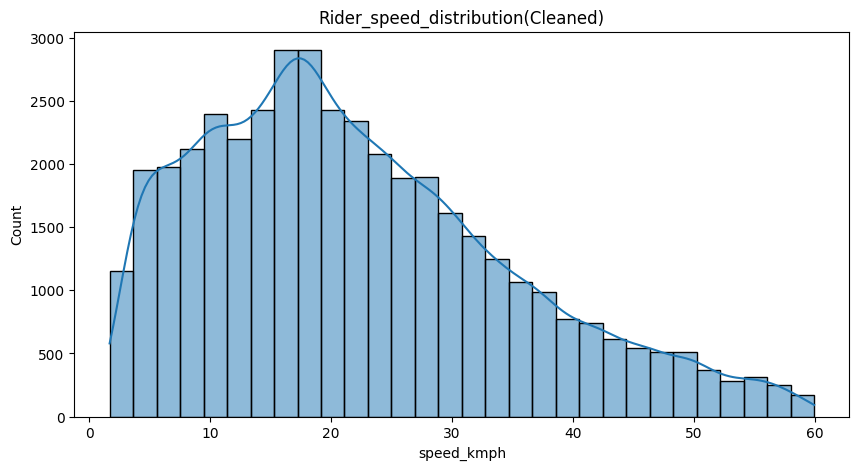

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(df['speed_kmph'],bins=30, kde=True)
plt.title('Rider_speed_distribution(Cleaned)')
plt.show()

In [25]:
def get_predicted(row):
    base_time = row['distance_km']*3
    #traffic buffer
    traffic_buffer = 0
    if row['Road_traffic_density'] == 'Jam':
        traffic_buffer = 15
    elif row['Road_traffic_density'] == 'High':
        traffix_buffer = 10

    # weather buffer
    Weatherconditions = str(row['Weatherconditions'])
    weather_buffer = 0 
    if 'Stromy' in Weatherconditions or 'Fog' in Weatherconditions:
        weather_buffer = 7
    elif 'Sandtorm' in Weatherconditions:
        weather_buffer = 5

    return base_time + 10 + traffic_buffer + weather_buffer

df['predicted_eta'] = df.apply(get_predicted, axis =1)
df['predicted_eta']

C:\Users\Admin\AppData\Local\Temp\ipykernel_15852\2282698065.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['predicted_eta'] = df.apply(get_predicted, axis =1)


0        19.075448
1        85.550589
2        19.658273
3        33.371204
4        28.630414
           ...    
43680    14.469538
43681    58.023204
43682    23.971586
43683    28.697179
43684    53.223187
Name: predicted_eta, Length: 42069, dtype: float64

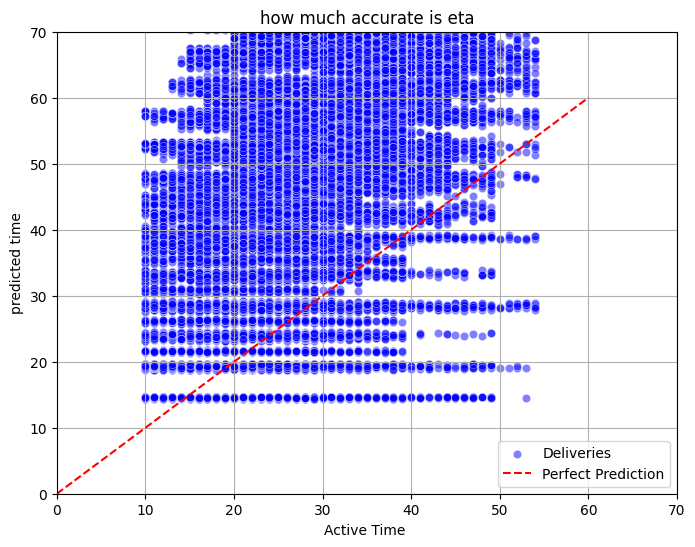

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Time_taken(min)'], y=df['predicted_eta'], alpha = 0.5,color='blue', label ='Deliveries')
plt.plot([0,60], [0,60],color = 'red', linestyle = '--', label='Perfect Prediction')
plt.xlim(0,70)
plt.ylim(0,70)
plt.title('how much accurate is eta')
plt.xlabel('Active Time ')
plt.ylabel('predicted time')
plt.legend()
plt.grid(True)
plt.show()

In [27]:
df.to_csv('final_prediction.csv',index = False)